In [1]:
import random
from plotnine import *
from plotnine.data import mpg
from plotnine import ggplot
import numpy as np
import pandas as pd

In [2]:
def echange(a: int, b: int) -> [int, int]:
    """Fonction pour échanger deux entiers"""
    temp = a
    a = b
    b = temp
    return a, b

In [3]:
def affiche(table: list) -> None:
    """Fonction qui affiche un tableau"""
    print(table)
    print("\n")

In [4]:
class Experience:
    def __init__(self, m: int, p: int) -> None:
        """
        Fonction qui cree une expérience et la stocke dans la structure passée en paramètre
        Attention : il faut que p ≤ m
        :param m: Nombre de marqueurs
        :type m: int
        :param p: Nombre de marqueurs positifs
        :type p: int
        marqueurs: Tous les marqueurs
        marqueurs_positifs: Les marqueurs positifs
        """
        self.m = m

        self.marqueurs = [i for i in range(0, m)]
        # random.shuffle uses fisher-yates algorithm
        random.shuffle(self.marqueurs)

        tmp = [i for i in range(0, m)]
        self.p = p
        self.marqueurs_positifs = []
        for i in range(0, p):
            j = random.randint(0, m - 1 - i)
            self.marqueurs_positifs.insert(i, self.marqueurs[tmp[j]])
            tmp[j] = tmp[m - i - 1]

    def free_xp(self):
        self.marqueurs.clear()
        self.marqueurs_positifs.clear()

In [5]:

def merge(arr: list, left_index: int, middle_index: int, right_index: int) -> None:
    """
    Algorithme de tri fusion
    Merges two subarrays of arr[].
    First subarray is arr[l..m]
    Second subarray is arr[m+1..r]
    :param arr:
    :param left_index:
    :param middle_index:
    :param right_index:
    :return:
    """
    n1 = middle_index - left_index + 1
    n2 = right_index - middle_index
    left, right = [], []
    for i in range(0, n1):
        left.insert(i, arr[left_index + i])
    for j in range(0, n2):
        right.insert(j, arr[middle_index + 1 + j])

    i, j, k = 0, 0, left_index
    while i < n1 and j < n2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = left[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = right[j]
        j += 1
        k += 1

In [6]:

def merge_sort(arr: list, left_index: int, right_index: int) -> None:
    """
    l is for left index and r is right index of the sub-array of arr to be sorted
    :param arr:
    :param left_index:
    :param right_index:
    :return:
    """
    if left_index < right_index:
        m = left_index + (right_index - left_index) // 2

        merge_sort(arr, left_index, m)
        merge_sort(arr, m + 1, right_index)

        merge(arr, left_index, m, right_index)

In [7]:
def marqueurs_negatifs1(xp: Experience) -> [list]:
    """
    Fonction a completer - Stratégie 1
    :param xp:
    :return:
    """
    cpt_op = 0
    nn = xp.m - xp.p
    res = []
    for elt in xp.marqueurs:
        found, tmpop = rech_seq(xp.marqueurs_positifs, elt)
        cpt_op += tmpop
        if not found:
            res.append(elt)
        if len(res) == nn:
            break
    return res, cpt_op

In [8]:
def rech_seq(array, marqueur_rech):
    op=0
    for elt in array:
        op += 1
        if elt == marqueur_rech:
            return True, op
    return False, op

In [9]:
def marqueurs_negatifs2(xp: Experience) -> [list]:
    """
    Fonction a completer - Stratégie 2
    :param xp:
    :return:
    """
    xpn = xp.m - xp.p
    res = []
    merge_sort(xp.marqueurs_positifs, 0, xp.p - 1)
    cpt_op = 0
    for elt in xp.marqueurs:
        trouver, tmpop = rechercher_dico(xp.marqueurs_positifs, xp.p, elt)
        cpt_op += tmpop
        if not trouver:
            res.append(elt)
        if len(res) == xpn:
            break

    return res, cpt_op

In [10]:
def rechercher_dico(table: list, n: int, elt: int):
    bas, op, haut = 0,0, n - 1
    while True:
        op += 1
        milieu = (bas + haut) // 2
        if elt == table[milieu]:
            return True, op
        elif table[milieu] < elt:
            bas = milieu + 1
        else:
            haut = milieu - 1
        if not bas <= haut:
            break
    return False, op

In [11]:
def marqueurs_negatifs3(xp: Experience) -> [list]:
    """
    Fonction a completer - Stratégie 3
    :param xp:
    :return:
    """
    nn = xp.m - xp.p
    cpt_op, debut, pos = 0, 0, 0
    res = []
    merge_sort(xp.marqueurs, 0, xp.m - 1)
    merge_sort(xp.marqueurs_positifs, 0, xp.p - 1)
    for p in xp.marqueurs_positifs:
        cpt_op += 1
        pos = position(xp.marqueurs, p)
        for i in range(debut, pos):
            cpt_op += 1
            res.append(xp.marqueurs[i])
        debut = pos + 1
        if len(res) == nn:
            break
    if len(res) < nn:
        for i in range(pos + 1, xp.m):
            cpt_op += 1
            res.append(xp.marqueurs[i])

    return res, cpt_op

In [12]:
def position(t, elt):
    for i in range(len(t)):
        if t[i] == elt:
            return i
    return -1

In [13]:
def test(p: int, m: int):
    xp = Experience(m, p)
#    print("Marqueurs :\n")
#    affiche(xp.marqueurs)
#    print("Marqueurs positifs :\n")
#    affiche(xp.marqueurs_positifs)

    # print("Stratégie 1\n")
    marqueurs_negatifs, cpt1 = marqueurs_negatifs1(xp)
    # print("Marqueurs négatifs :\n")
    # affiche(marqueurs_negatifs)
    # print("Stratégie 1 / Nombres d'opérations : " + str(cpt) + "\n\n")
    marqueurs_negatifs.clear()

    # print("Stratégie 2\n")
    marqueurs_negatifs, cpt2 = marqueurs_negatifs2(xp)
    # print("Marqueurs négatifs :\n")
    # affiche(marqueurs_negatifs)
    # print("Stratégie 2 / Nombres d'opérations : " + str(cpt) + "\n\n")
    marqueurs_negatifs.clear()

    # print("Stratégie 3\n")
    marqueurs_negatifs, cpt3 = marqueurs_negatifs3(xp)
    # print("Marqueurs négatifs :\n")
    # affiche(marqueurs_negatifs)
    # print("Stratégie 3 / Nombres d'opérations : " + str(cpt) + "\n\n")
    marqueurs_negatifs.clear()

    res_list=[m,p,cpt1,cpt2,cpt3]
    return res_list



In [14]:
res_list = []
m = 10
for i in range(1, 11):
    with open("res-" + str(m) + ".dat", "a") as file:
        file.write("m p 1 2 3\n")
        for p in range(1, m + 1):
            res = ' '.join(str(e) for e in test(p, m))
            file.write(res+"\n")
    res_list.clear()
    m += 10

In [15]:
df = pd.read_csv('res-100.dat',sep="\s+",skiprows=1,usecols=[0,1,2,3,4],names=['m','p','1','2','3'])
df = pd.melt(df,id_vars='p',value_vars=['1','2','3'],value_name="Nombre d'opérations", var_name="Stratégie")
print(df)


       p Stratégie  Nombre d'opérations
0      1         1                  100
1      2         1                  199
2      3         1                  297
3      4         1                  394
4      5         1                  490
..   ...       ...                  ...
295   96         3                   97
296   97         3                   58
297   98         3                   28
298   99         3                   83
299  100         3                    1

[300 rows x 3 columns]


<IPython.core.display.Javascript object>


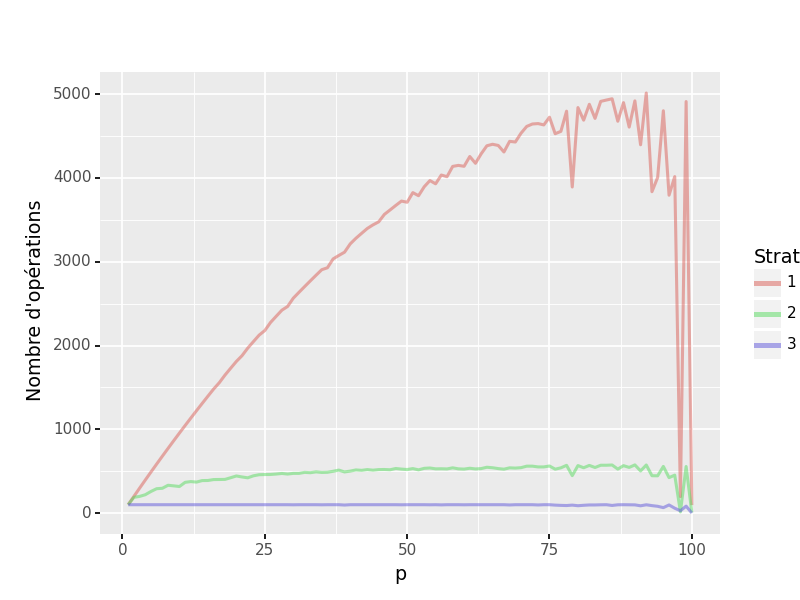

<ggplot: (175446381433)>

In [17]:
%matplotlib notebook
ggplot(df) +aes(x="p",y="Nombre d'opérations",group='Stratégie')+ geom_line(aes(color='Stratégie'),size=1,alpha=0.5)